In [115]:
import gdal
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

%matplotlib inline

Specify the MxD03 Geolocation file we want to look at

In [45]:
filepath = r'C:\Users\steve\OneDrive\Documents\School Stuff\UW\Mountain Hydrology Research Group\MODIS\Tuolumne_2017_MxD03\MOD03.A2017109.0520.061.2017314020111.hdf'

Open the file with GDAL

In [46]:
a = gdal.Open(filepath)

Inspect the file to see its SDSs

In [47]:
a.GetSubDatasets()

[('HDF4_EOS:EOS_SWATH:"C:\\Users\\steve\\OneDrive\\Documents\\School Stuff\\UW\\Mountain Hydrology Research Group\\MODIS\\Tuolumne_2017_MxD03\\MOD03.A2017109.0520.061.2017314020111.hdf":MODIS_Swath_Type_GEO:Scan Offset',
  '[4060x2708] Scan Offset MODIS_Swath_Type_GEO (8-bit integer)'),
 ('HDF4_EOS:EOS_SWATH:"C:\\Users\\steve\\OneDrive\\Documents\\School Stuff\\UW\\Mountain Hydrology Research Group\\MODIS\\Tuolumne_2017_MxD03\\MOD03.A2017109.0520.061.2017314020111.hdf":MODIS_Swath_Type_GEO:Track Offset',
  '[4060x2708] Track Offset MODIS_Swath_Type_GEO (8-bit integer)'),
 ('HDF4_EOS:EOS_SWATH:"C:\\Users\\steve\\OneDrive\\Documents\\School Stuff\\UW\\Mountain Hydrology Research Group\\MODIS\\Tuolumne_2017_MxD03\\MOD03.A2017109.0520.061.2017314020111.hdf":MODIS_Swath_Type_GEO:Height Offset',
  '[4060x2708] Height Offset MODIS_Swath_Type_GEO (8-bit integer)'),
 ('HDF4_EOS:EOS_SWATH:"C:\\Users\\steve\\OneDrive\\Documents\\School Stuff\\UW\\Mountain Hydrology Research Group\\MODIS\\Tuolumne

Load the longitude, latitude, and height SDSs with GDAL

In [131]:
latitude = gdal.Open('HDF4_SDS:UNKNOWN:"C:\\Users\\steve\\OneDrive\\Documents\\School Stuff\\UW\\Mountain Hydrology Research Group\\MODIS\\Tuolumne_2017_MxD03\\MOD03.A2017109.0520.061.2017314020111.hdf":0')
longitude = gdal.Open('HDF4_SDS:UNKNOWN:"C:\\Users\\steve\\OneDrive\\Documents\\School Stuff\\UW\\Mountain Hydrology Research Group\\MODIS\\Tuolumne_2017_MxD03\\MOD03.A2017109.0520.061.2017314020111.hdf":1')
height = gdal.Open('HDF4_SDS:UNKNOWN:"C:\\Users\\steve\\OneDrive\\Documents\\School Stuff\\UW\\Mountain Hydrology Research Group\\MODIS\\Tuolumne_2017_MxD03\\MOD03.A2017109.0520.061.2017314020111.hdf":5')

Read each SDS as an array

In [132]:
latitude = latitude.ReadAsArray()
longitude = longitude.ReadAsArray()
height = height.ReadAsArray()

Plot both latitude and longitudes, and the height map

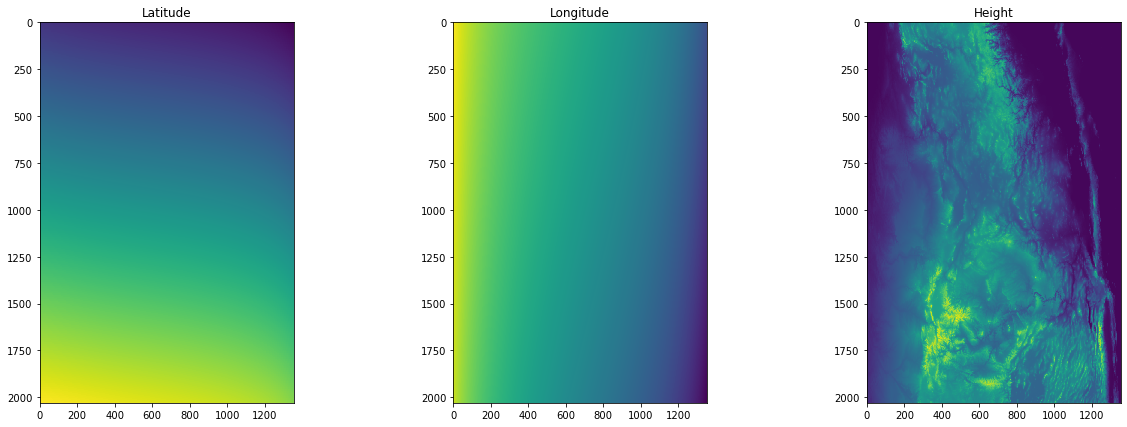

In [161]:
fig, ax = plt.subplots(1,3,figsize=(21,7))

ax[0].imshow(latitude, interpolation='nearest')
ax[0].set_title('Latitude')

ax[1].imshow(longitude, interpolation='nearest')
ax[1].set_title('Longitude');

ax[2].imshow(height, interpolation='nearest')
ax[2].set_title('Height');

Plot the hight map projected correctly

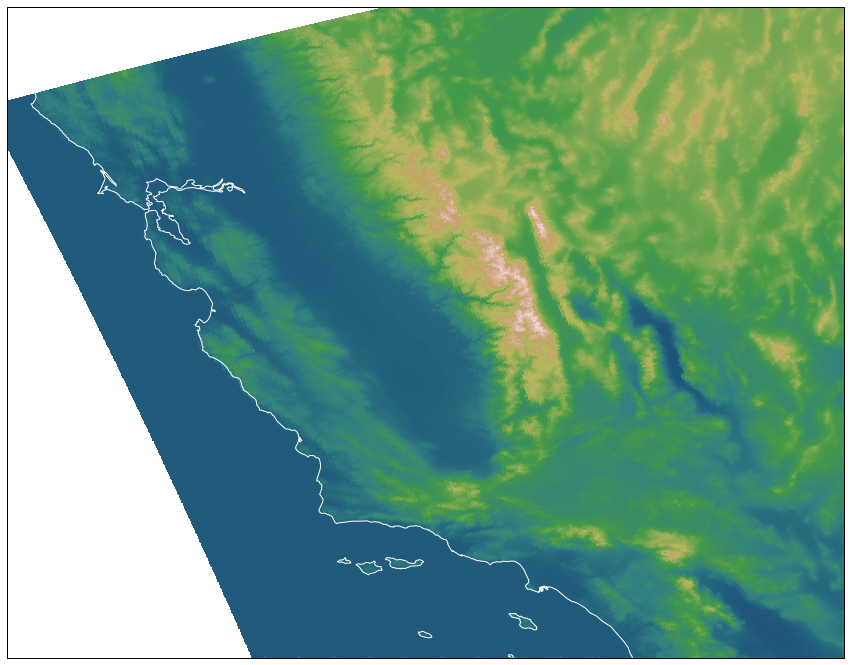

In [160]:
plt.figure(figsize=(15,15))

img_extent = (-124, -115, 33, 40)

ax = plt.axes(extent=img_extent, projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m', color='white', linewidth=1)

plt.pcolormesh(longitude, latitude, height, cmap=plt.cm.gist_earth, vmin=-1000, transform=ccrs.PlateCarree())

plt.show()

In [162]:
latitude.shape

(2030, 1354)